In [1]:
import os
import openai
from dotenv import load_dotenv
from sql_market_agent.agent.agent import create_sql_market_agent
from langchain_openai.chat_models import ChatOpenAI
from langchain_community.chat_models import ChatOllama
from langchain.callbacks import StdOutCallbackHandler
from langchain.agents import AgentType

import matplotlib.pyplot as plt
import numpy as np

load_dotenv()

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")
DB_PORT = os.getenv("POSTGRES_PORT", "5432")
DB_NAME = os.environ.get("POSTGRES_DB")
DB_USER = os.environ.get("POSTGRES_USER")
DB_PASSWORD = os.environ.get("POSTGRES_PASSWORD")

In [2]:
%matplotlib inline


In [3]:
# For using open ai models
openai.api_key = OPENAI_API_KEY
llm = ChatOpenAI(temperature=0, 
                 model="gpt-4-0125-preview", 
                 streaming=True, 
                 model_kwargs={"seed": 123})
sql_llm = ChatOpenAI(temperature=0, 
                 model="gpt-4-0125-preview", 
                 streaming=True, 
                 model_kwargs={"seed": 123})
code_llm = ChatOpenAI(temperature=0, 
                 model="gpt-4-0125-preview", 
                 streaming=True, 
                 model_kwargs={"seed": 123})


agent_executor = create_sql_market_agent(
    llm=llm,
    sql_llm=sql_llm,
    code_llm=code_llm,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    preinitialize_database=True,
    # to load specified stocks instead of internal default list from stocks.json
    # stocks=["CAT", "NKE", "XOM"], 
)

TypeError: create_sql_market_agent() missing 2 required positional arguments: 'sql_llm' and 'code_llm'

/home/oleh/arkad/arkad-demo/arkad-sql-demo/notebooks/.venv/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...


2024-02-10 06:17:28,691 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `sql_database_tool` with `What are all the close prices for XOM with their respective dates?`




> Entering new AgentExecutor chain...


2024-02-10 06:17:31,147 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `sql_db_query_checker` with `SELECT date, close FROM stockdata WHERE symbol = 'XOM' ORDER BY date LIMIT 10`




2024-02-10 06:17:33,201 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


SELECT date, close FROM stockdata WHERE symbol = 'XOM' ORDER BY date LIMIT 10

2024-02-10 06:17:34,833 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `sql_db_query` with `SELECT date, close FROM stockdata WHERE symbol = 'XOM' ORDER BY date LIMIT 10`


[('2024-01-12', 99.94999694824219), ('2024-01-16', 97.69000244140625), ('2024-01-17', 96.9800033569336), ('2024-01-18', 96.80000305175781), ('2024-01-19', 96.94999694824219), ('2024-01-22', 96.81999969482422), ('2024-01-23', 97.91000366210938), ('2024-01-24', 99.5999984741211), ('2024-01-25', 102.12999725341797), ('2024-01-26', 103.0)]

2024-02-10 06:17:36,784 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The close prices for XOM with their respective dates are as follows:

1. 2024-01-12: 99.95
2. 2024-01-16: 97.69
3. 2024-01-17: 96.98
4. 2024-01-18: 96.80
5. 2024-01-19: 96.95
6. 2024-01-22: 96.82
7. 2024-01-23: 97.91
8. 2024-01-24: 99.60
9. 2024-01-25: 102.13
10. 2024-01-26: 103.00

> Finished chain.
The close prices for XOM with their respective dates are as follows:

1. 2024-01-12: 99.95
2. 2024-01-16: 97.69
3. 2024-01-17: 96.98
4. 2024-01-18: 96.80
5. 2024-01-19: 96.95
6. 2024-01-22: 96.82
7. 2024-01-23: 97.91
8. 2024-01-24: 99.60
9. 2024-01-25: 102.13
10. 2024-01-26: 103.00

2024-02-10 06:17:47,735 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-02-10 06:18:15,880 - WARNING - Python REPL can execute arbitrary code. Use with caution.



Invoking: `PythonREPLTool` with `{'code': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Create a pandas DataFrame\nprices = {'Date': ['2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26'],\n          'Close Price': [99.95, 97.69, 96.98, 96.80, 96.95, 96.82, 97.91, 99.60, 102.13, 103.00]}\ndf = pd.DataFrame(prices)\n\n# Convert the 'Date' column to datetime format\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Set the 'Date' column as the index\ndf.set_index('Date', inplace=True)\n\n# Plot the close prices\nplt.figure(figsize=(10,6))\nplt.plot(df['Close Price'])\nplt.title('XOM Close Prices')\nplt.xlabel('Date')\nplt.ylabel('Close Price ($)')\nplt.grid(True)\nplt.show()", 'task_type': 'plot', 'df_representation': '{"Date": ["2024-01-12", "2024-01-16", "2024-01-17", "2024-01-18", "2024-01-19", "2024-01-22", "2024-01-23", "2024-01-24", "2024-01-25", "2024-01-26"], "Close Price": [99.95, 97.6

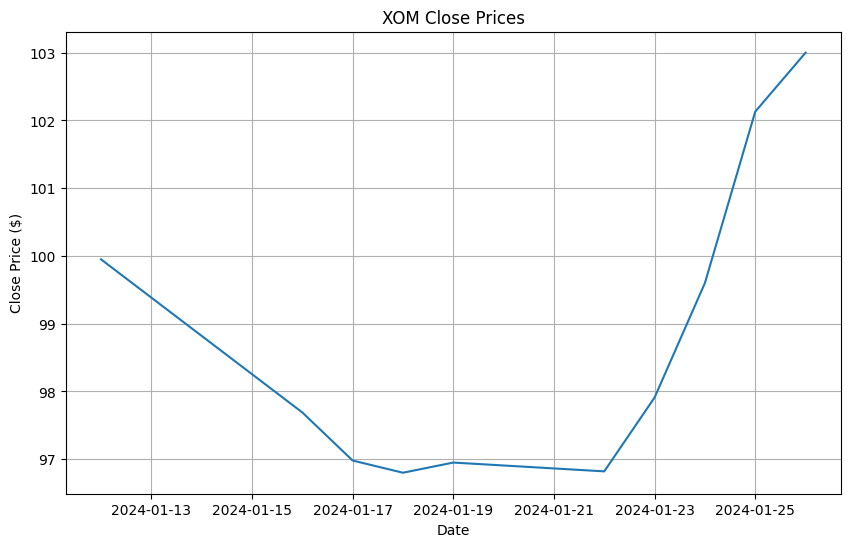

{"output": "Succesfully executed:\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Create a pandas DataFrame\nprices = {'Date': ['2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26'],\n          'Close Price': [99.95, 97.69, 96.98, 96.80, 96.95, 96.82, 97.91, 99.60, 102.13, 103.00]}\ndf = pd.DataFrame(prices)\n\n# Convert the 'Date' column to datetime format\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Set the 'Date' column as the index\ndf.set_index('Date', inplace=True)\n\n# Plot the close prices\nplt.figure(figsize=(10,6))\nplt.plot(df['Close Price'])\nplt.title('XOM Close Prices')\nplt.xlabel('Date')\nplt.ylabel('Close Price ($)')\nplt.grid(True)\nplt.show()```\n", "stdout": "", "task_type": "plot", "df_representation": "{\"Date\": [\"2024-01-12\", \"2024-01-16\", \"2024-01-17\", \"2024-01-18\", \"2024-01-19\", \"2024-01-22\", \"2024-01-23\", \"2024-01-24\", \"2024-01-25\", \

2024-02-10 06:18:16,974 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [4]:
input = """Plot xom close prices for last 3 days"""
response = agent_executor(
            {"input": input, "chat_history": []},
            # callbacks=[StdOutCallbackHandler()],
)

